二阶差分序列的ADF检验结果为： (-2.213782994476361, 0.20128111008085658, 14, 139, {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}, 745.2353478262291)


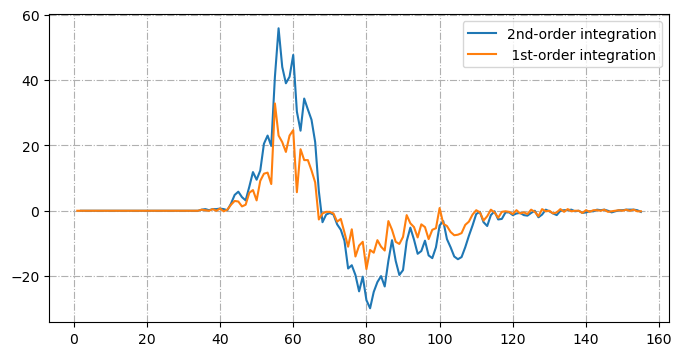

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import itertools
import warnings
import csv


import seaborn as sns
from  statsmodels.tsa.arima_model  import  ARIMA
import statsmodels as sm
from scipy import stats 

from statsmodels.tsa.stattools import adfuller
df=pd.read_excel('hk5thProcessed.xlsx')

df["death_avg_diff_1"] = df["avgDeath"].diff(1)  #一阶差分
df["death_avg_diff_2"] = df["avgDeath"].diff(2)  #二阶差分

#原始数据平稳性检测
#print(u'一阶差分序列的ADF检验结果为：',  ADF(df["avgDeath"][:]))

#一阶差分平稳性检测（ADF检验、单位根检验）
from  statsmodels.tsa.stattools  import  adfuller  as  ADF
#print(u'一阶差分序列的ADF检验结果为：',  ADF(df["death_avg_diff_1"][1:]))
#返回值依次为adf、pvalue、usedlag、nobs、critical  values、icbest、regresults、resstore  p<0.05时表示稳定

#二阶差分平稳性检测（ADF检验、单位根检验）
from  statsmodels.tsa.stattools  import  adfuller  as  ADF
print(u'二阶差分序列的ADF检验结果为：',  ADF(df["death_avg_diff_2"][2:]))
#返回值依次为adf、pvalue、usedlag、nobs、critical  values、icbest、regresults、resstore  p<0.05时表示稳定

plt.figure(figsize = (8,4))
plt.plot(df["death_avg_diff_2"],label = "2nd-order integration")
plt.plot(df["death_avg_diff_1"],label = " 1st-order integration")
#plt.plot(df["avgDeath"],label = "newly death number per day")
plt.legend()
plt.grid(linestyle = '-.')
#信息准则定阶：AIC、BIC
#import statsmodels.api as sm
#def get_pq(data):
#    #AIC
#    AIC = sm.tsa.arma_order_select_ic(data, max_ar=6, max_ma=4, ic='aic')['aic_min_order']
#    #BIC
#    BIC = sm.tsa.arma_order_select_ic(data, max_ar=6, max_ma=4, ic='bic')['bic_min_order']
#    print('the AIC is{},\nthe BIC is{}\n'.format(AIC,BIC))
#get_pq(df['avgDeath'])

由于二阶差分之后p值还是很高，death的数据不建议直接使用ARIMA 模型